In [1]:
import math
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import hcpdatautils as hcp

In [2]:
bool_type = torch.bool
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
data_dir = 'E:\\HCP_data'
results_dir = 'E:\\Ising_model_results_daai'

In [5]:
all_feature_std_means_training_file = os.path.join(results_dir, f'all_feature_std_means_training.pt')
all_feature_std_means_training = torch.load(all_feature_std_means_training_file)
print( 'all feature std means training size', all_feature_std_means_training.size() )
print(f'x mean {all_feature_std_means_training[1,0]}, x std. dev. {all_feature_std_means_training[0,0]}')
print(f'y mean {all_feature_std_means_training[1,1]}, y std. dev. {all_feature_std_means_training[0,1]}')
print(f'z mean {all_feature_std_means_training[1,2]}, z std. dev. {all_feature_std_means_training[0,2]}')
print(f'thickness mean {all_feature_std_means_training[1,3]}, thickness std. dev. {all_feature_std_means_training[0,3]}')
print(f'myelination mean {all_feature_std_means_training[1,4]}, myelination std. dev. {all_feature_std_means_training[0,4]}')
print(f'curvature mean {all_feature_std_means_training[1,5]}, curvature std. dev. {all_feature_std_means_training[0,5]}')
print(f'sulcus depth mean {all_feature_std_means_training[1,6]}, sulcus depth std. dev. {all_feature_std_means_training[0,6]}')
print(f'SC mean {all_feature_std_means_training[1,7]}, SC std. dev. {all_feature_std_means_training[0,7]}')

all feature std means training size torch.Size([2, 8])
x mean 0.282479465007782, x std. dev. 36.09518051147461
y mean -19.034297943115234, y std. dev. 40.39975357055664
z mean 15.755375862121582, z std. dev. 26.44620704650879
thickness mean 2.71549129486084, thickness std. dev. 0.3447764813899994
myelination mean 1.31252920627594, myelination std. dev. 0.12537194788455963
curvature mean 0.02498970925807953, curvature std. dev. 0.062339287251234055
sulcus depth mean -0.07536640018224716, sulcus depth std. dev. 0.4023302495479584
SC mean 0.0021822776179760695, SC std. dev. 0.014714096672832966


In [6]:
data_subset = 'training'
node_features_file = os.path.join(results_dir, f'node_features_{data_subset}.pt')
node_features = torch.load(node_features_file)
print( 'node features size', node_features.size() )
edge_features_file = os.path.join(results_dir, f'edge_features_{data_subset}.pt')
edge_features = torch.load(edge_features_file)
print( 'edge features size', edge_features.size() )
all_features_file = os.path.join(results_dir, f'all_features_{data_subset}.pt')
all_features = torch.load(all_features_file)
print( 'all features size', all_features.size() )

node features size torch.Size([669, 360, 8])
edge features size torch.Size([669, 64620, 17])
all features size torch.Size([669, 66060])


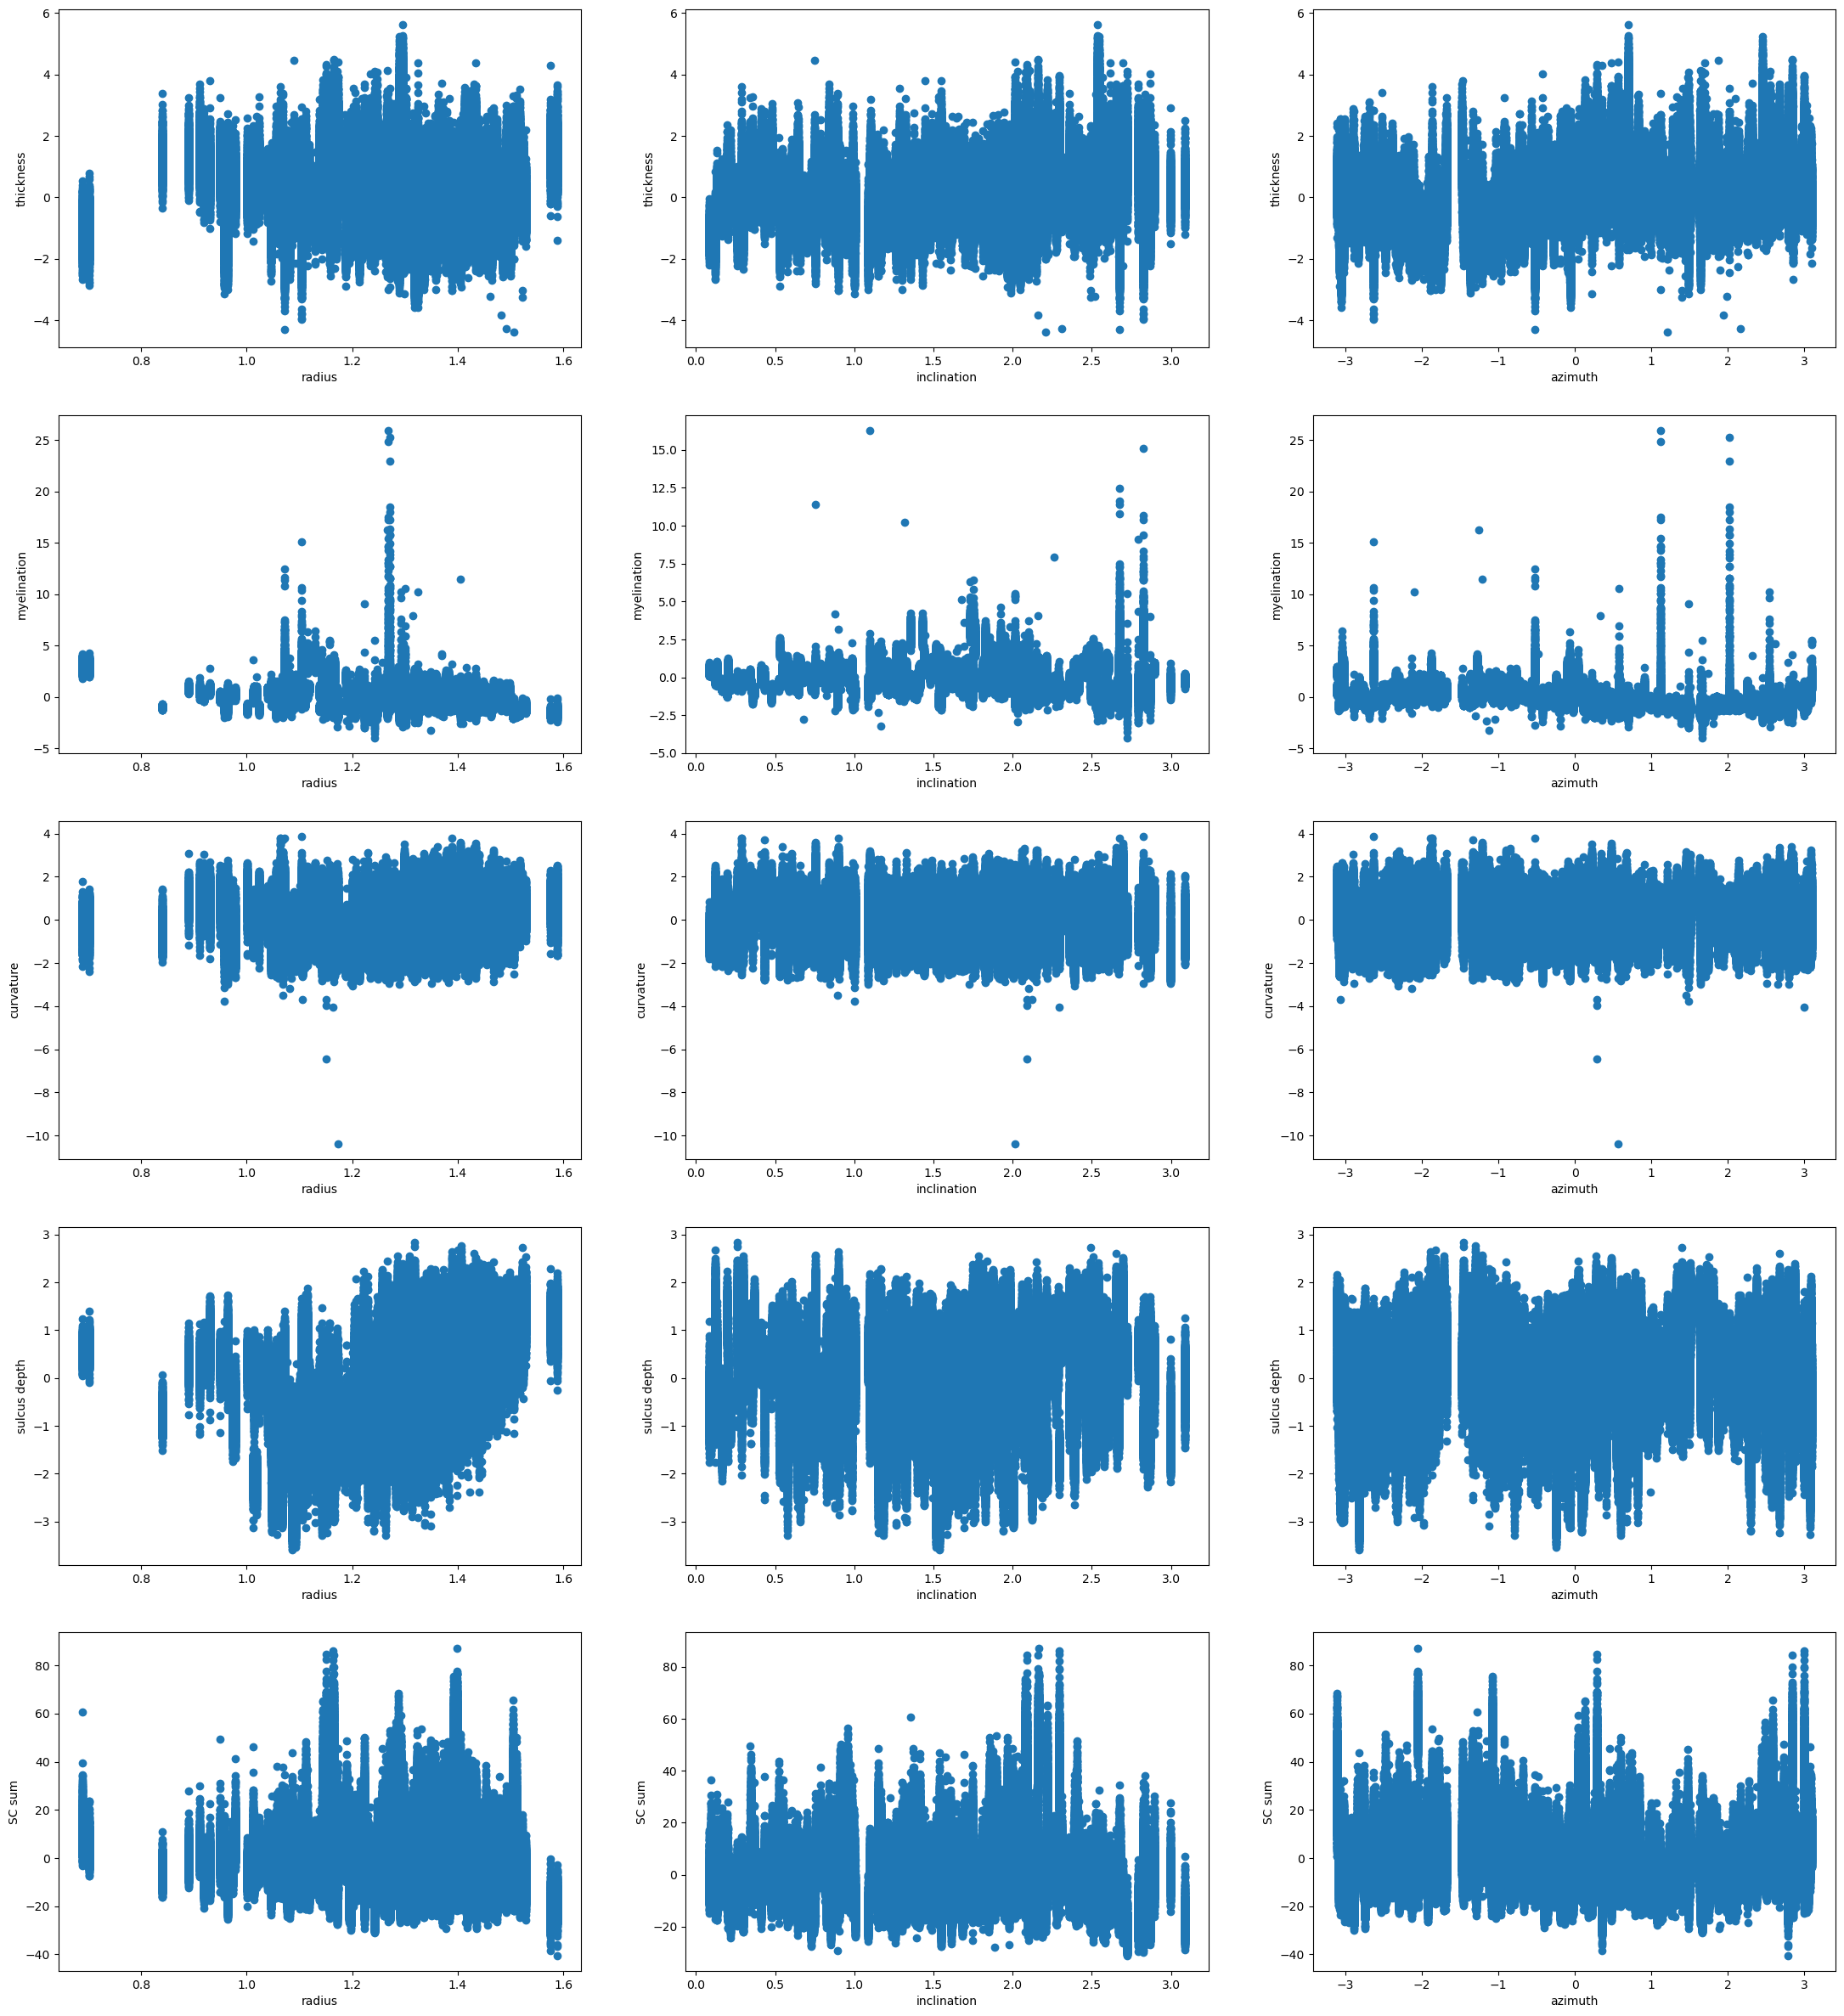

In [9]:
feature_names = ['thickness', 'myelination', 'curvature', 'sulcus depth', 'SC sum']
coord_names = ['radius', 'inclination', 'azimuth']
num_features = len(feature_names)
num_coords = len(coord_names)
fig, axs = plt.subplots( nrows=num_features, ncols=num_coords, figsize=(9*num_coords, 6*num_features) )
for feature in range(num_features):
    for coord in range(num_coords):
        coord_values = node_features[:,:,coord]
        feature_values = node_features[:,:,num_coords+feature]
        axs[feature, coord].scatter( x=coord_values.detach().cpu().numpy(), y=feature_values.detach().cpu().numpy() )
        axs[feature, coord].set_xlabel(coord_names[coord])
        axs[feature, coord].set_ylabel(feature_names[feature])
plt.show()

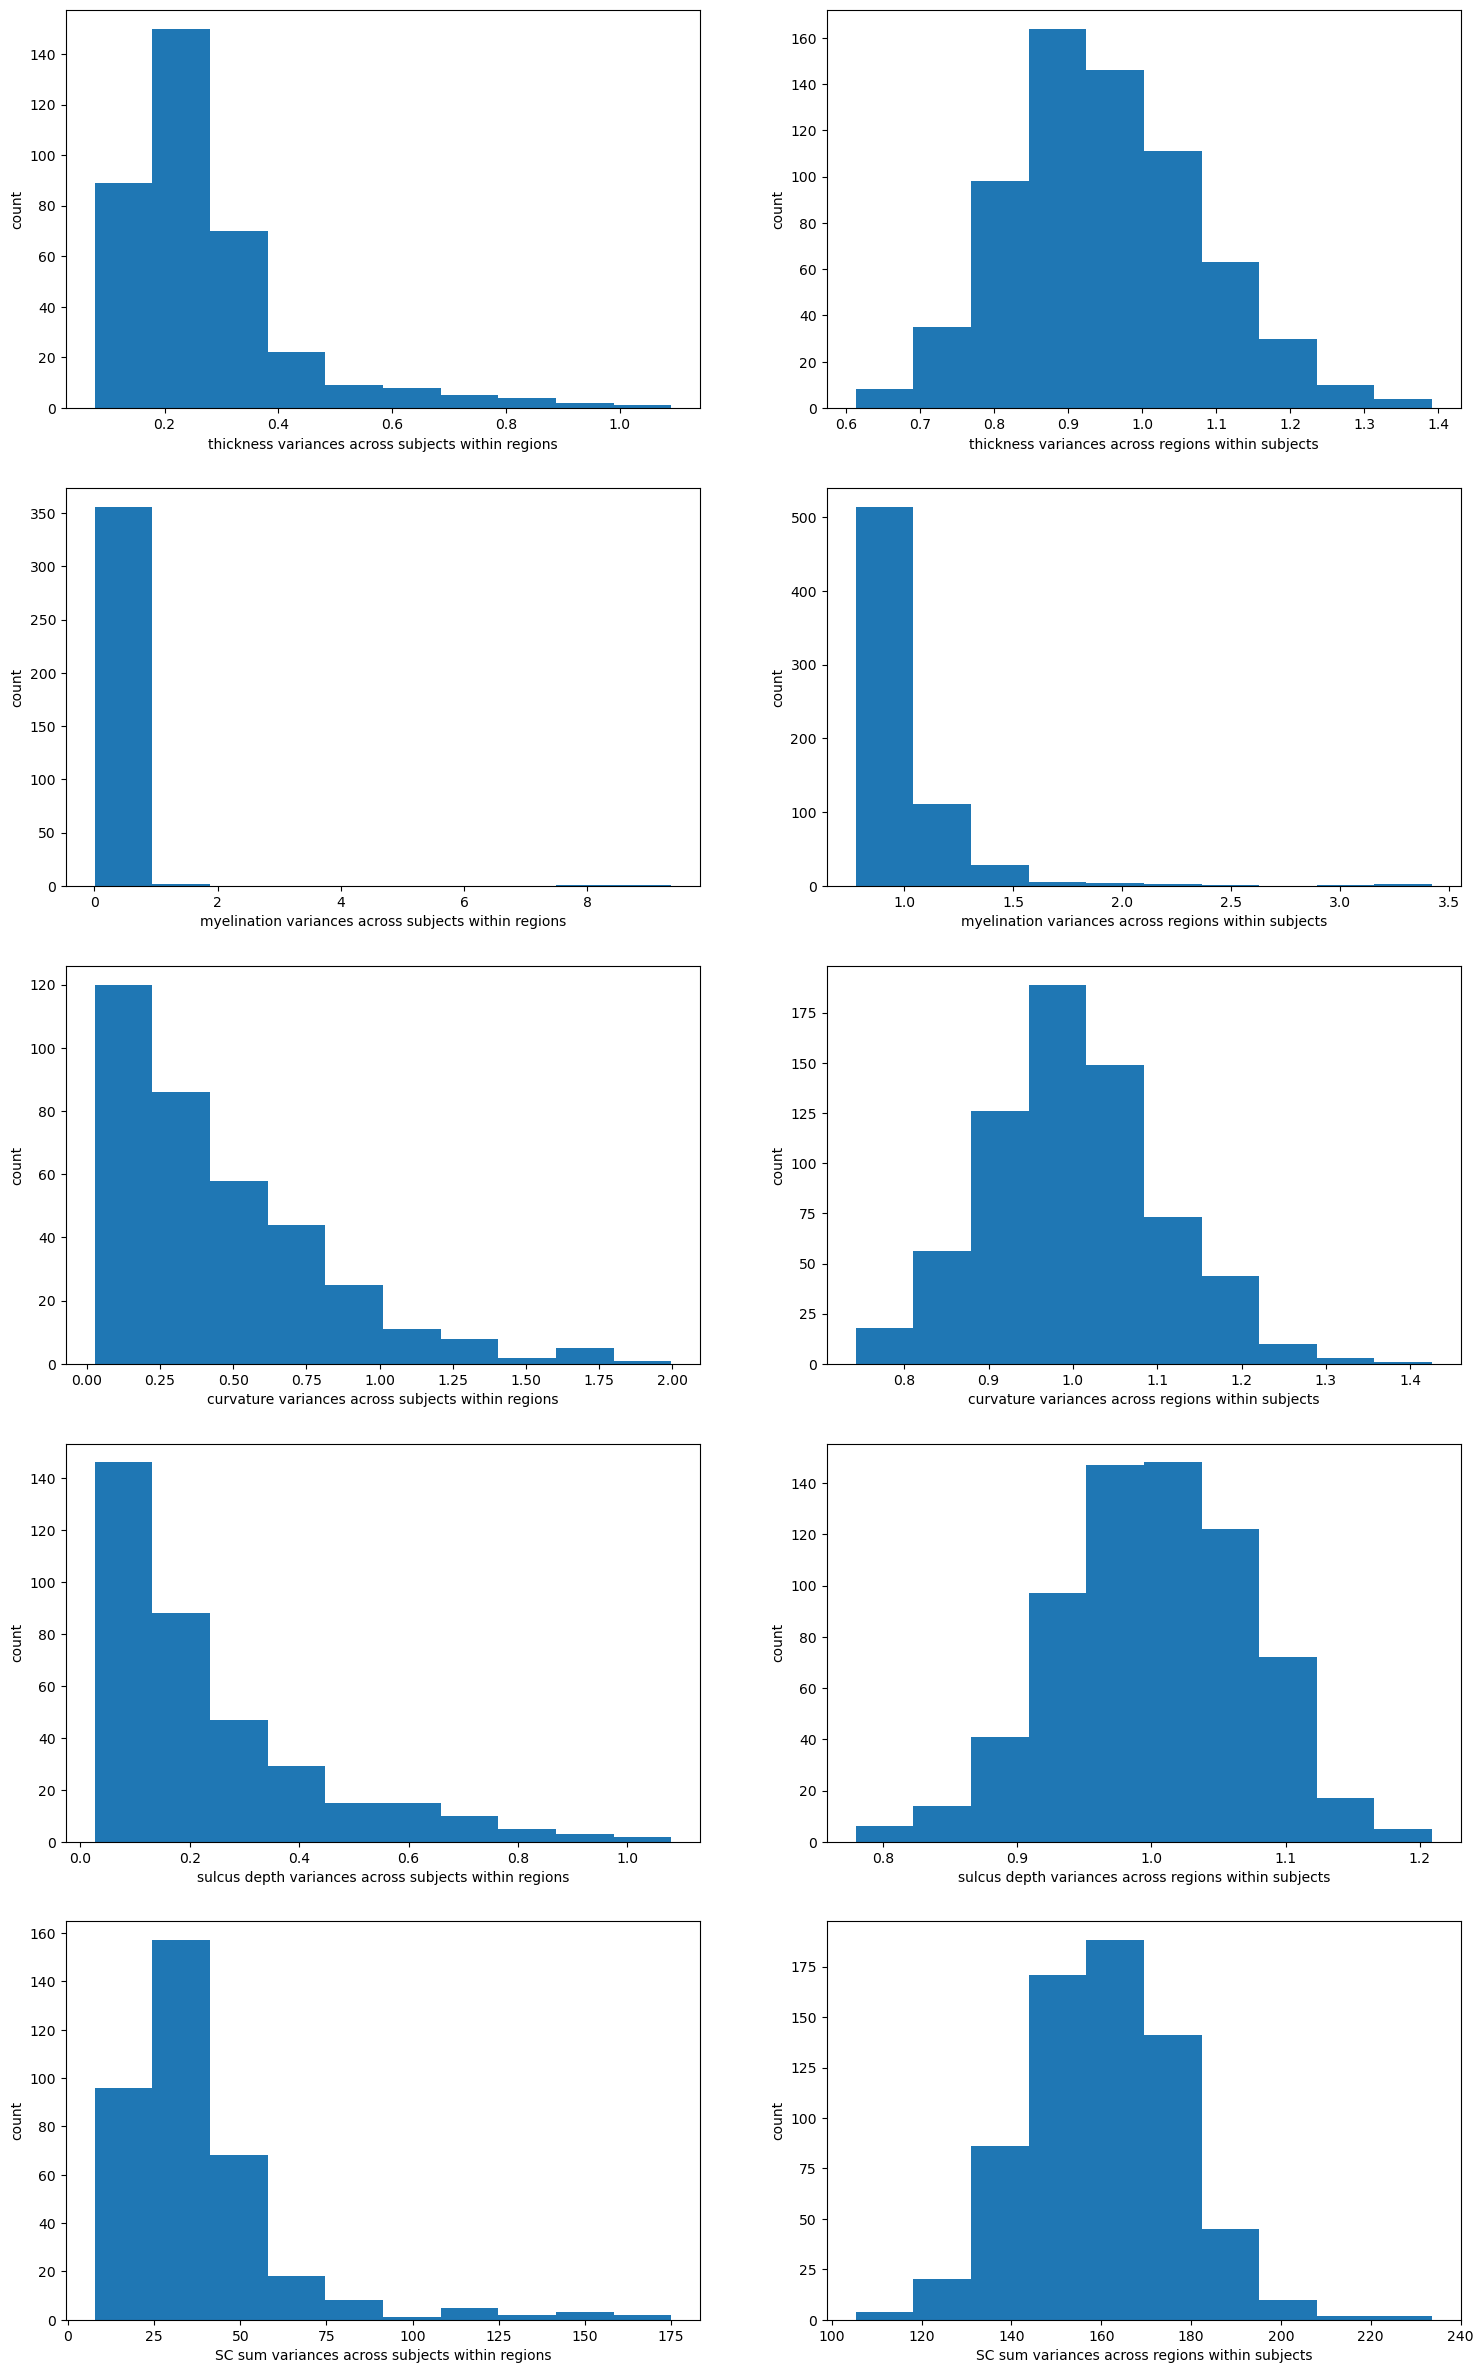

In [11]:
within_region_variances = node_features.var(dim=0)# Take the variance of each feature at each region over subjects.
between_region_variances = node_features.var(dim=1)# Take the variance of each feature for each subject over regions.
fig, axs = plt.subplots( nrows=num_features, ncols=2, figsize=(9*2, 6*num_features) )
for feature in range(num_features):
    axs[feature,0].hist( within_region_variances[:,num_coords+feature].detach().cpu().numpy() )
    axs[feature,0].set_xlabel(f'{feature_names[feature]} variances across subjects within regions')
    axs[feature,0].set_ylabel('count')
    axs[feature,1].hist( between_region_variances[:,num_coords+feature].detach().cpu().numpy() )
    axs[feature,1].set_xlabel(f'{feature_names[feature]} variances across regions within subjects')
    axs[feature,1].set_ylabel('count')
plt.show()

In [13]:
variance_over_regions_of_mean_over_subjects = node_features.mean(dim=0).var(dim=0)# Take the mean over subjects, then the variance over regions.
variance_over_subjects_of_mean_over_regions = node_features.mean(dim=1).var(dim=0)# Take the mean over regions, then the variance over subjects.
print(feature_names)
print( variance_over_regions_of_mean_over_subjects[3:].tolist() )
print( variance_over_subjects_of_mean_over_regions[3:].tolist() )

['thickness', 'myelination', 'curvature', 'sulcus depth', 'SC sum']
[0.727988600730896, 0.894558310508728, 0.5491735339164734, 0.769005537033081, 125.28502655029297]
[0.053465522825717926, 0.00026241206796839833, 0.0008031455799937248, 0.000668667140416801, 2.9698920249938965]
